# 导入要用到的包

In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns  #a high-level Python data visualization library based on matplotlib. 
from matplotlib.pyplot import cm
%matplotlib inline


#显示中文问题
if platform.system() == "Darwin":
    # 简易设置以让matplotlib能显示中文
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
elif platform.system() == "Windows":
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 简易设置以让matplotlib能显示中文
elif platform.system() == 'Linux': # in our case, if using cloud IDE
    font_dirs = ["./Fonts/"]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] #简易设置以让matplotlib能显示中文

# 第四讲 第一次课堂实验

## 二项分布的近似

### Python练习  二项分布的正态近似
- 二项分布有两个参数 (n,p)
- n 表示bernoulli实验的次数
- p 表示每次bernoulli实验"成功"的概率
- np.exp(-3)
- np.power(2,3)
- np.math.factorial(3)
- n*p, n^3,
- 遇到不懂的函数 使用 ? 或者直接用搜索引擎搜索
    - ?sp.stats.norm
    - ?np.linspace

In [3]:
x = 2
y = 2.1
z = x + y

In [4]:
if  x > y:
    print(x)
else:
    print(y)

2.1


In [5]:
for i in range(0,101):
    if i %7 ==0:
        print(i)
    else:
        pass

0
7
14
21
28
35
42
49
56
63
70
77
84
91
98


In [6]:
list_1 = [1, 3, 6, 9]

In [7]:
print()

- 关于一个图的各个部分，官网给出了figure, ax的具体含义讲解 https://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure
- 或者参考这篇tutorial https://zhuanlan.zhihu.com/p/93423829

In [8]:
n_list = [10, 20, 30, 40, 50, 75, 100,150,200] #新建一个list, 用于存储二项分布的参数n
p = 0.2  #指定一个二项分布的概率p

In [9]:
def draw_binomial(n_list,p,xmax=70,fit=True):
    fig, ax = plt.subplots(figsize=(7,3),dpi=200) # 新建一个图，大小为(7,3)inches,分辨率dpi为200
    color=cm.rainbow(np.linspace(0.5,1,len(n_list))) #建立了一个colormap，把每个分布曲线对应一个颜色。np.linspace 产生一列等距离的数，从 0.5 到 1, 个数为len(n_list)

    for i, n in enumerate(n_list):  #for 循环，枚举n_list中每一个元素 n，以及其对应的index i. 
        x = np.arange(0, n+1) # x, 因为x取值是离散的，所以个数为 0 到 n, np.arange() 产生一列数,从 0 到 n+1，左闭右开(即右边只取到n)。

        y = sp.stats.binom.pmf(x, n, p)  #括号里三个参数，分别是support of Y(as a list), n, p
        _ = ax.plot(x, y, 'o-' ,color=color[i],markersize=3,linewidth=1,alpha=.6, label='n=%d'%n) #画图
    
        if fit:
            normfit = sp.stats.norm.pdf(x,n*p,np.power(n*p*(1-p),0.5)) #按照上节课的讲解，n足够大时，二项分布趋向于正态分布，均值为n*p, 方差为n*p*(1-p)
            _ = ax.plot(x,normfit,'*-',color='blue',markersize=1,linewidth=0.2,alpha=0.9) #画出正态分布的图像
    
    ax.set_xlim(0,xmax) #确定画布上x-axis的范围
    ax.set_xlabel("x",fontsize=14) 
    ax.set_ylabel("y",rotation=0) 
    ax.set_title("二项分布")
    _ = ax.legend() #添加图例

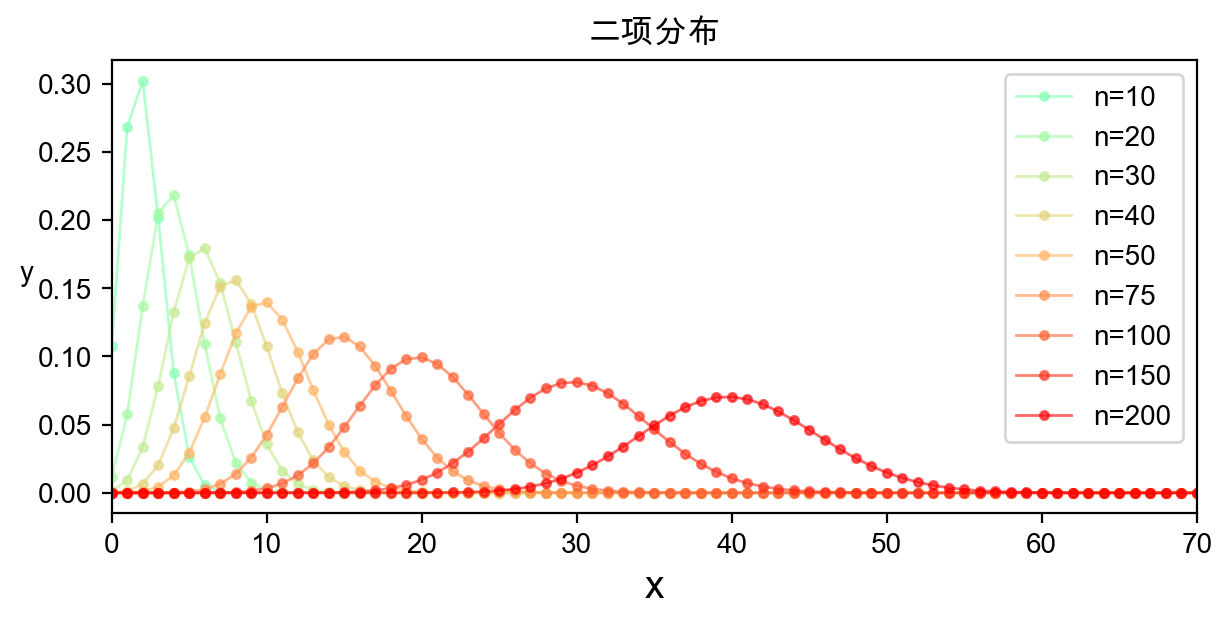

In [10]:
draw_binomial(n_list=n_list,p=p,xmax=70,fit=False)

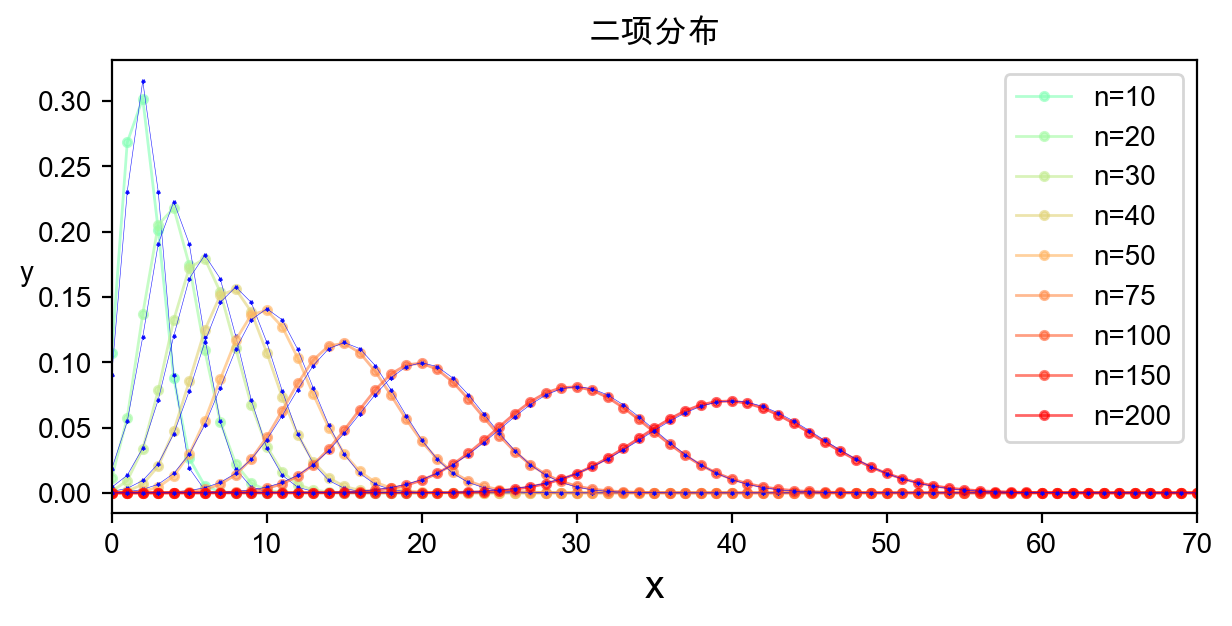

In [11]:
draw_binomial(n_list=n_list,p=p,xmax=70,fit=True)

### $\color{red}{课后练习}$
- 生成一个array，取值从 2 到 25
- 画一个最简单的图，x 从 1 到 100， $y = x^2$
- 写一个for 循环 上面生成的array， 打印array里的每个数
- for循环里面添加一个If条件函数，如果array里面的数能被5整除，则打印数字，否则pass
- 写一个最简单的函数，输入一个array, 完成上面for循环的功能，同时返回打印的次数。

## 变量的类型

- 离散变量:
    - 定类变量: 男，女。  成功， 失败。
    - 定序变量: 满意度 [1，2，3，4，5]
- 连续变量
    - 年龄
    - 价格
    - 。。。

## Titanic数据集分析
![titanic](titanic.gif)

In [15]:
df = pd.read_csv('./titanic_all.csv') #读取数据

In [16]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [17]:
df.shape #行，列数

(1309, 12)

In [18]:
df.dtypes #列出所有变量的数据类型， int 整数型 float 浮点型 object:类别/字符串

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- 可以使用df.info() 更快捷地展示了数据集的基本信息

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


- 通过df.describe() 查看变量的基本统计信息

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


- 变量类型如下

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [21]:
df.head(10) #展示前10行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
df['Survived'] #取某一列

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [24]:
df.Survived

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [25]:
Counter(df['Sex']), Counter(df['Embarked'])

(Counter({'male': 843, 'female': 466}),
 Counter({'S': 914, 'C': 270, 'Q': 123, nan: 2}))

In [26]:
sp.stats.mode(df['Sex']),sp.stats.mode(df['Pclass']) #众数

(ModeResult(mode=array(['male'], dtype=object), count=array([843])),
 ModeResult(mode=array([3]), count=array([709])))

- 缺失数据展示

In [27]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 给定类变量重新编码

In [28]:
# 找出所有的categorical的变量
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

- 其中 Sex 是重新需要编码的，可以用下面的方法

In [29]:
df["Sex"] = df["Sex"].astype('category') #astype指定变量类型为category

In [30]:
df["Sex_cat"] = df["Sex"].cat.codes #生成数字编码，然后添加到新的列里面

In [31]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


- 重命名变量

In [32]:
df = df.rename(columns={'Sex_cat':"isMale"}) # 注意重命名完之后要再“代回”给df

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0


- 也可以用replace的方法替换变量的值

In [34]:
df['Sex_cat2'] = df['Sex'] #新建一列，其值等于Sex
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMale,Sex_cat2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,female


In [35]:
recoding=  {"Sex_cat2": {"male":1,"female":0} } #重新编码的方式
df = df.replace(recoding) #替换
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMale,Sex_cat2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0


In [36]:
df = df.drop(columns=['Sex_cat2']) #删除某一列
#或者使用 df.drop(columns=['Sex_cat2'],inplace=True) #删除某一列

### 定类变量的描述分析

- 幸存/死亡的统计

In [37]:
#Counter(df['Survived']) #也可以用Counter
df['Survived'].value_counts()

0    815
1    494
Name: Survived, dtype: int64

- 各性别人数的bar plot

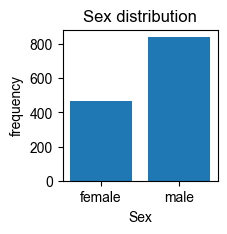

In [38]:
figure,ax = plt.subplots(figsize=(2,2),dpi=100)
x = df['Sex']
labels, counts = np.unique(x, return_counts=True) #返回数值和频数
_ = ax.bar(labels, counts, align='center')
_ = ax.set_title("Sex distribution")
_ = ax.set_ylabel("frequency",fontsize=10)
_ = ax.set_xlabel("Sex",fontsize=10)

# x = df['Pclass']
# labels, counts = np.unique(x, return_counts=True) #返回数值和频数
# _ = ax.bar(labels, counts, align='center')

- 年龄

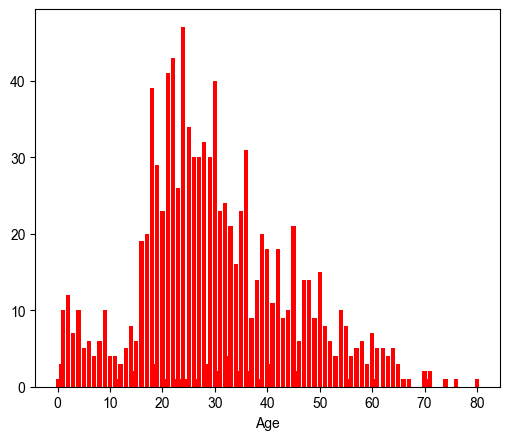

In [39]:
figure,ax = plt.subplots(figsize=(6,5),dpi=100)
x = df['Age']
labels, counts = np.unique(x, return_counts=True) #返回数值和频数
_ = ax.bar(labels, counts, align='center',color="red")
_ = plt.xlabel("Age")

### 连续变量的描述分析

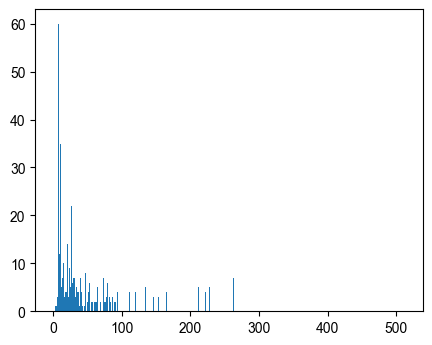

In [40]:
# 因为连续变量取值太多了，所以直接用频数会很不好看
figure,ax = plt.subplots(figsize=(5,4),dpi=100)
x = df['Fare']
labels, counts = np.unique(x, return_counts=True) #返回数值和频数
_ = plt.bar(labels, counts, align='center')

- 使用 kernal density estimate(KDE) plot: 连续取值的变量可视化效果较好

KDE plot is a histogram that aims to approximate the underlying probability density function that generated the data by binning and counting observations. Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using discrete bins, a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate.

https://en.wikipedia.org/wiki/Kernel_density_estimation

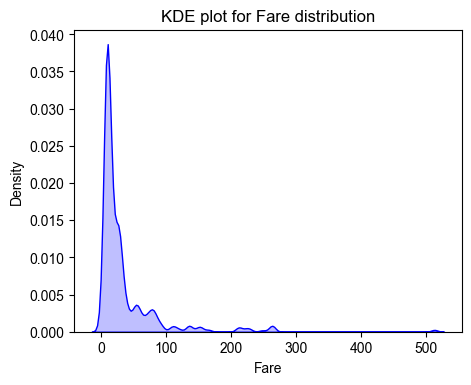

In [41]:
figure,ax = plt.subplots(figsize=(5,4),dpi=100)
x = df['Fare']
_ = sns.kdeplot(x,color='b',shade=True,bw_adjust=0.4) # bw_adjust是smoothing的参数，越大越平滑
_ = plt.title("KDE plot for Fare distribution")

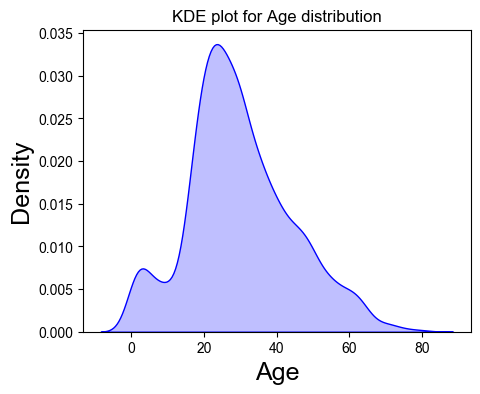

In [42]:
# 类似地，年龄也可以这样来刻画
figure,ax = plt.subplots(figsize=(5,4),dpi=100)
x = df['Age']
_ = sns.kdeplot(x,color='b',shade=True,bw_adjust=0.8) # bw_adjust是smoothing的参数，越大越平滑
_ = plt.xlabel('Age', fontsize=18)
_ = plt.ylabel('Density', fontsize=18)
_ = plt.title("KDE plot for Age distribution")

### 按照条件选取数据

- 选择二等舱(Pclass==2)的票价数据

In [43]:
x = df[df['Pclass']==2]['Fare']
#x = df[(df['Pclass']==2)&(df['Sex']=="female")]['Fare'] # 多个条件，用 & 连接，每个条件各自加上()
#x = df[(df['Pclass']==2)&(df['Sex']=="female")][['Fare','Age']] # 多个条件，用 & 连接，每个条件各自加上()

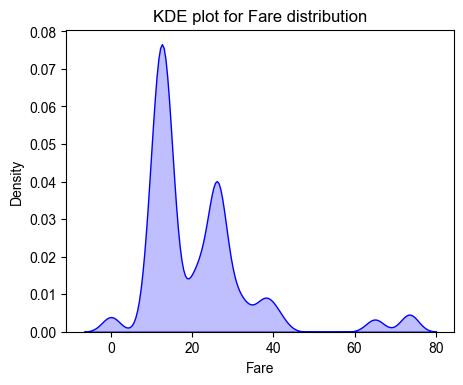

In [44]:
# 看看二等舱的票价分布
figure,ax = plt.subplots(figsize=(5,4),dpi=100)
_ = sns.kdeplot(x,color='b',shade=True,bw_adjust=0.5) # bw_adjust是smoothing的参数，越大越平滑
_ = plt.title("KDE plot for Fare distribution")

### 连续值归并

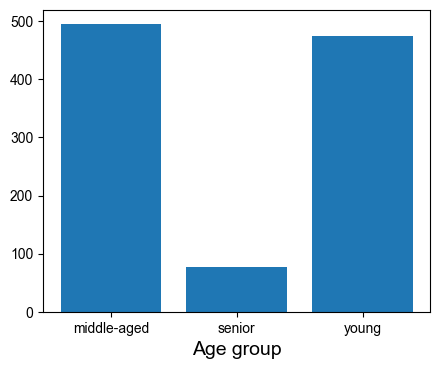

In [45]:
# 把所有unique的年龄取值平均分成三等分, 有小到大分别命名为"young", "middle-aged", "senior"
df['age_group'] = pd.cut(df.Age, 3, labels=["young", "middle-aged", "senior"])


figure,ax = plt.subplots(figsize=(5,4),dpi=100)
x = df['age_group'].dropna()
labels, counts = np.unique(x, return_counts=True) #返回数值和频数
_ = ax.bar(labels, counts, align='center')
_ = plt.xlabel("Age group",fontsize=14)

### $\color{red}{课后练习}$
- 画出 SibSp 的分布，并简要描述其特征
- 画出 Pclass 的分布，并简要描述其特征

### 变量间的关系: 生存率分析
- 性别与生存几率
- 仓位等级与生存几率

- crosstab: 两个或两个以上变量的交叉列表

In [46]:
ct = pd.crosstab(df['Survived'],df['Sex'],margins = True)
ct

Sex,female,male,All
Survived,,,
0,81,734,815
1,385,109,494
All,466,843,1309


- crosstab也可以展示比例

In [47]:
#ct = pd.crosstab(df['Survived'],df['Sex'],normalize="index",margins = True,) #按照行 计算百分比
#ct = pd.crosstab(df['Survived'],df['Sex'],normalize=True,margins = True) #按照总量 计算百分比
ct = pd.crosstab(df['Survived'],df['Sex'],normalize="columns",margins = False)#按照列 计算百分比
ct

Sex,female,male
Survived,,
0,0.17382,0.8707
1,0.82618,0.1293


- 用heatmap展示crosstab产生的矩阵

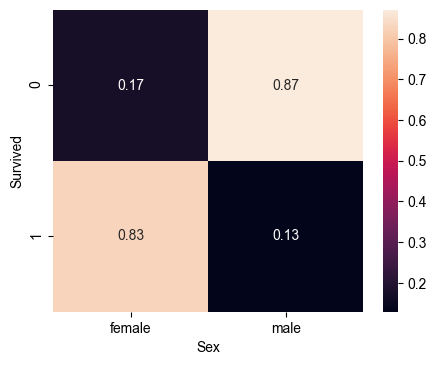

In [48]:
fig = plt.figure(dpi=100,figsize=[5,4])
sns.heatmap(ct, annot=True,fmt='.2f') #fmt 可以调整展示数值是整数，'d'，还是小数 :例如 '.2f' 表示小数点后2位, 试一试'.2g',
plt.show()

- 也可以用bar显示

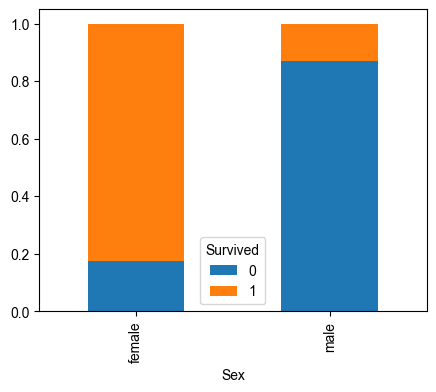

In [49]:
ct = pd.crosstab(df['Sex'],df['Survived'],normalize="index")

fig = plt.figure(dpi=100,figsize=[5,4])
_ = ct.plot.bar(stacked=True,ax = plt.gca()) #try stacked=False
plt.show()

#### 变量的线性相关关系( *linear* correlation)

三种correlation的方法
- 什么是线性相关？ 
    - look at what non-independence does to their product.
    - 一种几何的理解
- Pearson correlation: 最常用
    - ![公式](pearson_sample.svg)
- Kendall : Kendall Tau correlation coefficient:  ordinal association between two measured quantities
    - 任取两个观察值，其变量x的大小顺序跟y的大小顺序一致的，称为同序对condordant paris,反之称为discordant pairs
    - https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient
    - $$
    \tau ={\frac {({\text{number of concordant pairs}})-({\text{number of discordant pairs}})}{n \choose 2}}
    $$
- Spearman : Spearman rank correlation
    - 排序代替数值
    - IQ
    - $$
    r_{s}=\rho _{\operatorname {rg} _{X},\operatorname {rg} _{Y}}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}}
    $$
    - Identical values are usually each assigned fractional ranks equal to the average of their positions in the ascending order of the values
    - The Spearman correlation is less sensitive than the Pearson correlation to strong outliers that are in the tails of both samples. That is because Spearman's ρ limits the outlier to the value of its rank.

- 先去除不需要的变量

In [60]:
num_df = df.copy() #复制一份新数据
num_df.drop('PassengerId',axis="columns",inplace=True) #去掉PassengerId, inplace意味着改变直接发生，我们不需要再把传递回num_df
num_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isMale,age_group,age_group_cat
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,young,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,middle-aged,2.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,young,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,middle-aged,2.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,middle-aged,2.0


- 相关系数矩阵能够非常快地展示数据中各个变量之间的线性关联，以便进一步的分析

In [61]:
corrMatrix = num_df.corr() #相关系数矩阵
corrMatrix

,Survived,Pclass,Age,SibSp,Parch,Fare,isMale,age_group_cat
Survived,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622,-0.688371,-0.008621
Pclass,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629,0.124617,-0.372314
Age,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740,0.063645,0.864537
SibSp,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238,-0.109609,-0.154855
Parch,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539,-0.213125,-0.075490
Fare,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000,-0.185523,0.178616
isMale,-0.688371,0.124617,0.063645,-0.109609,-0.213125,-0.185523,1.000000,0.043950
age_group_cat,-0.008621,-0.372314,0.864537,-0.154855,-0.075490,0.178616,0.043950,1.000000


- 用heatmap 更加直观地显示correlation matrix。

- 参数: 
    - cmap 颜色。可选的 Accent, Blues,Greens,Greys,Oranges,Purples, BrBG, CMRmap...
    - vmin=-1, vmax=1, center= 0 : 右边的bar取值的最大最小值
- [color guides](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f)

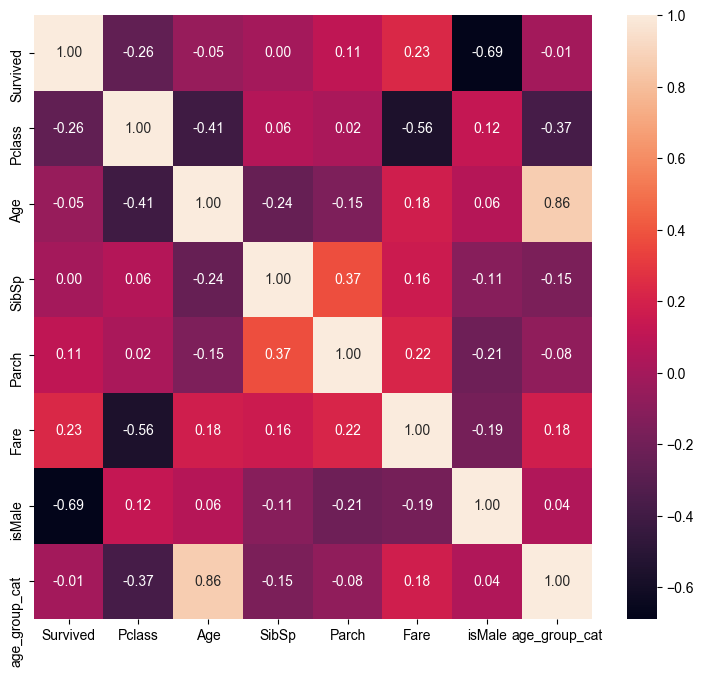

In [62]:
fig = plt.figure(dpi=100,figsize=[9,8])
sns.heatmap(corrMatrix, annot=True,fmt='.2f')#,cmap='Reds'
plt.show()

- 全部的correlation matrix 信息显得冗余，有时候我们也可以只显示下三角

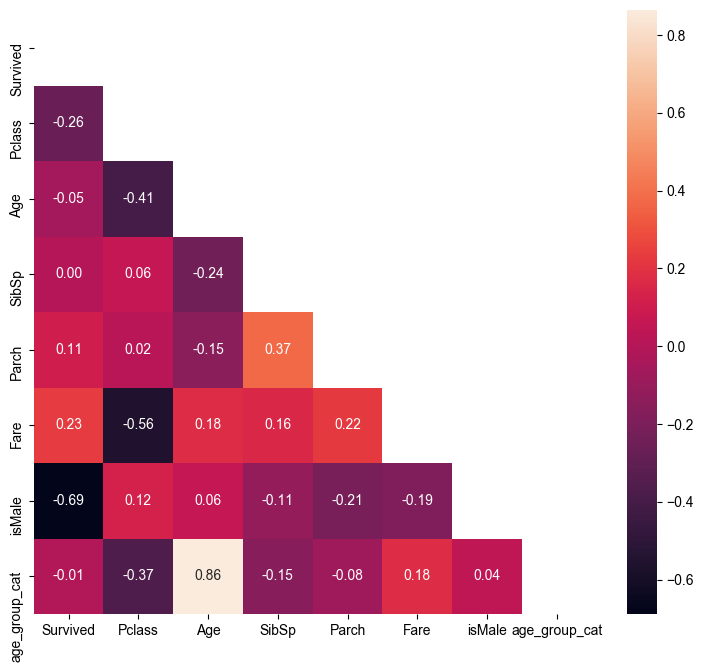

In [63]:
mask = np.triu(corrMatrix.corr()) # 新建一个mask,  np.triu() returns the lower triangle of any matrix

fig = plt.figure(dpi=100,figsize=[9,8])
sns.heatmap(corrMatrix, annot=True,fmt='.2f', mask=mask)
plt.show()

发现:
- 最容易发现的相关就是 isMale 和 Survival,  Pclass 跟Survival之间的关系也比较明显。
- 除了最容易发现的两个关系外，我们还能发现其他的细枝末节: isMale 跟 Parch, isMale 跟SibSp 之间的关系反映什么?

- 查看定序变量之间的Spearman相关

In [54]:
df['age_group_cat'] = df['age_group']

In [55]:
recoding=  {"age_group_cat": {"young":1,"middle-aged":2,"senior":3} } #重新编码的方式
df = df.replace(recoding) #替换

In [56]:
num_df = df[['Pclass','age_group_cat']]
corrMatrix = num_df.corr(method="spearman") #相关系数矩阵  method="kendall", method="pearson"
corrMatrix  #发现跟pearson的系数比较接近

,Pclass,age_group_cat
Pclass,1.000000,-0.359351
age_group_cat,-0.359351,1.000000


### $\color{red}{课后练习}$
- 分析不同仓位等级下性别和死亡率的关系（即双交叉列表，同时考虑Pclass和Sex时的cross tabulation），展示表格和热力图，并简要描述结果
- 分析不同年龄组下性别和死亡率的关系（即双交叉列表，同时考虑age_group和Sex时的cross tabulation），展示表格和热力图，并简要描述结果
- 计算三个仓位等级各自的票价分布的均值和方差。

# 参考资料
- scipy statistic 使用简介 https://oneau.wordpress.com/2011/02/28/simple-statistics-with-scipy/
- pandas 入门 https://www.pypandas.cn/docs/getting_started/10min.html#%E6%9F%A5%E7%9C%8B%E6%95%B0%E6%8D%AE
- matplotlib使用简介  https://wizardforcel.gitbooks.io/matplotlib-user-guide/content/3.1.html
- seaborn heatmap的使用简介  
    1. https://pythonbasics.org/seaborn-heatmap/  
    2. https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07